In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd
import numpy as np
import sys
from numpy.core._multiarray_umath import ndarray
import random
from numpy.random import RandomState, SeedSequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import datetime as dt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV

In [2]:
df = pd.read_csv("construction_projects_data.csv", sep= ',')

In [3]:
df

,Unnamed: 0,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,IDProject_0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,IDProject_1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,IDProject_2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,IDProject_3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,IDProject_4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2844,IDProject_2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06
2845,2845,IDProject_2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2846,2846,IDProject_2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2847,2847,IDProject_2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2849 non-null   int64  
 1   IDProject_                 2764 non-null   object 
 2   Area_                      2764 non-null   object 
 3   SubArea_                   2764 non-null   object 
 4   projectPhase_              2764 non-null   object 
 5   OriginalEstimate_          2764 non-null   float64
 6   CostToDate_                2764 non-null   float64
 7   Project_Category           2113 non-null   object 
 8   Contract_Type_             1863 non-null   object 
 9   Start_Date_                2764 non-null   object 
 10  EstimatedFinalCompletion_  2764 non-null   object 
 11  Actual_End_Date_           2764 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 267.2+ KB


,Unnamed: 0,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,IDProject_0,Area_0,Sub_Area_0,Completed,951920.00,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,IDProject_1,Area_1,Sub_Area_1,Completed,147839.60,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,IDProject_2,Area_1,Sub_Area_1,Completed,60705.18,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,IDProject_3,Area_2,Sub_Area_2,Completed,280482.79,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,IDProject_4,Area_3,Sub_Area_3,Completed,2833995.78,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01


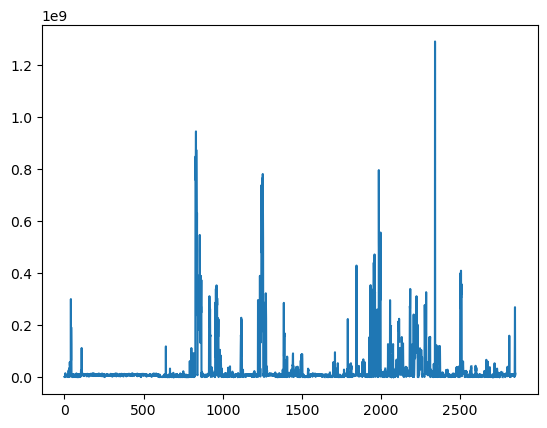

In [5]:
df['CostToDate_'].plot(subplots=True)
plt_title = 'CostToDate'
plt.show()

In [6]:
df.describe()

,Unnamed: 0,OriginalEstimate_,CostToDate_
count,2849.000000,2.764000e+03,2.764000e+03
mean,1424.000000,3.271337e+07,3.309327e+07
std,822.579783,8.538798e+07,9.088989e+07
min,0.000000,-9.529610e+05,-1.449374e+06
25%,712.000000,3.590268e+06,3.221238e+06
50%,1424.000000,8.218626e+06,7.988440e+06
75%,2136.000000,1.094719e+07,1.224396e+07
max,2848.000000,1.352435e+09,1.288670e+09


In [7]:
min_org_idx = df.OriginalEstimate_.idxmin()
min_cost_idx = df.CostToDate_.idxmin()
print(min_org_idx, min_cost_idx)

min_org = df.OriginalEstimate_[min_org_idx]
min_cost = df.CostToDate_[min_cost_idx]

2079 2079


In [8]:
df.at[min_org_idx, 'OriginalEstimate_'] = np.absolute(min_org)
df.at[min_cost_idx, 'CostToDate_'] = np.absolute(min_cost)

In [9]:
df.OriginalEstimate_

0       9.519200e+05
1       1.478396e+05
2       6.070518e+04
3       2.804828e+05
4       2.833996e+06
            ...     
2844    8.218626e+06
2845    1.298898e+08
2846    1.999900e+08
2847    8.190600e+06
2848    8.218626e+06
Name: OriginalEstimate_, Length: 2849, dtype: float64

In [10]:
df.query('OriginalEstimate_ < 0')

,Unnamed: 0,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
1095,1095,IDProject_943,Area_12,Sub_Area_12,Completed,-449676.93,-472220.237493,Institutional,NaN,2006-02-18,2008-08-20,NaN


In [11]:
df.at[1095, 'OriginalEstimate_'] = np.absolute(df.OriginalEstimate_[1095])
df.at[1095, 'CostToDate_'] = np.absolute(df.CostToDate_[1095])

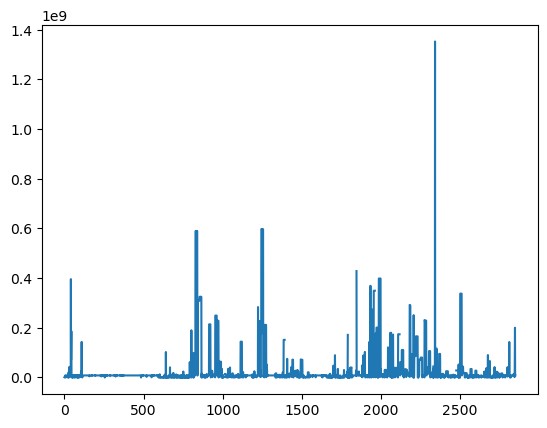

In [12]:
df['OriginalEstimate_'].plot(subplots=True)
plt_title = 'OriginalEstimate'
plt.show()

In [13]:
df['OriginalEstimate_'].describe()

count    2.764000e+03
mean     3.271438e+07
std      8.538759e+07
min      1.000000e-02
25%      3.590268e+06
50%      8.218626e+06
75%      1.094719e+07
max      1.352435e+09
Name: OriginalEstimate_, dtype: float64

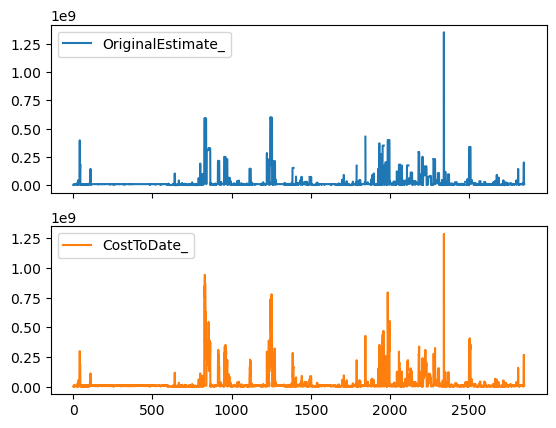

In [14]:
df[['OriginalEstimate_','CostToDate_']].plot(subplots=True)
plt.show()

In [15]:
df['index'] = df['Unnamed: 0']
df.drop(['Unnamed: 0'], axis=1)

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,index
0,IDProject_0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02,0
1,IDProject_1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25,1
2,IDProject_2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12,2
3,IDProject_3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31,3
4,IDProject_4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2844,IDProject_2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06,2844
2845,IDProject_2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18,2845
2846,IDProject_2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02,2846
2847,IDProject_2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28,2847


In [16]:
new_df = df[['index','IDProject_', 'Area_', 'SubArea_', 'projectPhase_', 'OriginalEstimate_', 'CostToDate_', 'Project_Category', 'Contract_Type_', 'Start_Date_', 'EstimatedFinalCompletion_', 'Actual_End_Date_']]
new_df

,index,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,IDProject_0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,IDProject_1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,IDProject_2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,IDProject_3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,IDProject_4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2844,IDProject_2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06
2845,2845,IDProject_2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2846,2846,IDProject_2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2847,2847,IDProject_2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


In [17]:
new_df['IDProject_'].isnull().sum()

85

In [18]:
nan_arr = np.where(pd.isnull(new_df['IDProject_']))
nan_arr

(array([  12,   14,   55,   83,   84,   99,  124,  252,  258,  301,  319,
         341,  388,  546,  609,  611,  691,  804,  805,  810,  818,  823,
         892,  906,  925,  931,  975, 1051, 1068, 1074, 1090, 1100, 1116,
        1187, 1189, 1230, 1300, 1307, 1316, 1454, 1467, 1472, 1555, 1572,
        1585, 1588, 1633, 1643, 1690, 1693, 1752, 1753, 1767, 1780, 1822,
        1854, 1897, 1955, 1959, 2015, 2093, 2101, 2122, 2161, 2205, 2219,
        2222, 2291, 2302, 2329, 2371, 2408, 2437, 2444, 2487, 2529, 2598,
        2601, 2676, 2700, 2732, 2754, 2764, 2772, 2825], dtype=int64),)

In [19]:
nan_list = list(nan_arr)
nan_l = nan_list[0].tolist()
print(len(nan_l))
print(nan_l)

85
[12, 14, 55, 83, 84, 99, 124, 252, 258, 301, 319, 341, 388, 546, 609, 611, 691, 804, 805, 810, 818, 823, 892, 906, 925, 931, 975, 1051, 1068, 1074, 1090, 1100, 1116, 1187, 1189, 1230, 1300, 1307, 1316, 1454, 1467, 1472, 1555, 1572, 1585, 1588, 1633, 1643, 1690, 1693, 1752, 1753, 1767, 1780, 1822, 1854, 1897, 1955, 1959, 2015, 2093, 2101, 2122, 2161, 2205, 2219, 2222, 2291, 2302, 2329, 2371, 2408, 2437, 2444, 2487, 2529, 2598, 2601, 2676, 2700, 2732, 2754, 2764, 2772, 2825]


In [20]:
new_df.iloc[nan_l, 1] = -1
#print(new_df.iloc[100:160, 1])

In [21]:
tot_list = []

for j in range(new_df['IDProject_'].shape[0]):
    if new_df.iloc[j, 1] != -1:
        new_df.iloc[j, 1] = str(new_df.iloc[j, 1]).replace('IDProject_', '')   

In [22]:
new_df

,index,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2844,2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06
2845,2845,2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2846,2846,2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2847,2847,2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


In [23]:
def replace_nan(data_frame):
    data_frame = data_frame
    for j in range(data_frame.shape[0]):
        if data_frame.iloc[j, 1] != -1:
            data_frame.iloc[j, 1] = str(data_frame.iloc[j, 1]).replace('IDProject_', '')
    return data_frame
    

In [26]:
drop_list = []
not_drop = []

for id_ in range(new_df['IDProject_'].shape[0]):
    if new_df.iloc[id_, 1] == -1:
        dif = int(new_df.iloc[id_+1, 1]) - int(new_df.iloc[id_-1, 1])
        if (dif == 0):
            #print(id_)
            drop_list.append(id_)
            
        elif (dif == 1):
            #print(id_)
            drop_list.append(id_)
                
        elif dif >=2:
            new_df.iloc[id_, 1] = int(new_df.iloc[id_ -1, 1]) + 1
            not_drop.append(id_)
        else:
            continue          
        

In [138]:
def cat_nan(data_frame):
    data_frame = data_frame
    drop_list = []
    not_drop = []

    for id_ in range(data_frame.shape[0]):
        if data_frame.iloc[id_, 1] == -1:
            dif = int(data_frame.iloc[id_+1, 1]) - int(data_frame.iloc[id_-1, 1])
            if (dif == 0):
                drop_list.append(id_)
            
            elif (dif == 1):
                drop_list.append(id_)
                
            elif dif >=2:
                data_frame.iloc[id_, 1] = int(data_frame.iloc[id_ -1, 1]) + 1
                not_drop.append(id_)
            else:
                continue
    return (drop_list, not_drop)
    

In [27]:
print(f'drop list: {drop_list}', '\n'f'not drop list: {not_drop}')

drop list: [12, 14, 823, 906, 931, 1116, 1230, 1454, 1467, 1955, 1959, 2015, 2101, 2122, 2161, 2219, 2222, 2291, 2302, 2371, 2408, 2444, 2598, 2601, 2732, 2754, 2764, 2772] 
not drop list: [55, 84, 99, 124, 252, 258, 301, 319, 341, 388, 546, 609, 611, 691, 805, 810, 818, 892, 925, 975, 1051, 1068, 1074, 1090, 1100, 1187, 1189, 1300, 1307, 1316, 1472, 1555, 1572, 1585, 1588, 1633, 1643, 1690, 1693, 1753, 1767, 1780, 1822, 1854, 1897, 2093, 2205, 2329, 2437, 2487, 2529, 2676, 2700, 2825]


In [28]:
mod_df = new_df.drop(drop_list, axis = 0)

In [29]:
mod_df.iloc[:,1]

0          0
1          1
2          2
3          3
4          4
        ... 
2844    2108
2845    2109
2846    2110
2847    2111
2848    2112
Name: IDProject_, Length: 2821, dtype: object

In [30]:
print(df.shape[0], mod_df.shape[0])

2849 2821


In [31]:
mod_df.reset_index()
mod_df.drop(['index'], axis=1)

mod_df.drop('index', axis = 1, inplace = True)
mod_df.to_csv('modified_id_df.csv', sep=',')
mod_df

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...
2844,2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06
2845,2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2846,2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2847,2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


# Checking the IDs

In [32]:
print(mod_df.iloc[1740:1750,1])

1749     Area_3
1750     Area_3
1751     Area_3
1752     Area_3
1753     Area_3
1754     Area_3
1755     Area_3
1756    Area_18
1757    Area_18
1758    Area_18
Name: Area_, dtype: object


In [33]:
mod_df = mod_df.drop(mod_df[mod_df.IDProject_ == -1].index)
mod_df = mod_df.drop(mod_df[mod_df.IDProject_ == 0].index)

In [34]:
mod_df.iloc[1730:1750,1]

1743     Area_3
1744     Area_3
1745     Area_3
1746     Area_3
1747     Area_3
1748     Area_3
1749     Area_3
1750     Area_3
1751     Area_3
1754     Area_3
1755     Area_3
1756    Area_18
1757    Area_18
1758    Area_18
1759    Area_18
1760    Area_18
1761     Area_2
1762     Area_2
1763     Area_2
1764     Area_2
Name: Area_, dtype: object

# Duplicates

In [35]:
def dup(x):
    duplicate = []
    unique = []
    for i in x:
        if i in unique:
            duplicate.append(i)
        else:
            unique.append(i)
    return (duplicate)
    

In [36]:
total = mod_df.IDProject_.tolist()
duplicate_values = dup(total)

# Modification of the costs

In [37]:
mod_df.reset_index(drop=True, inplace=True)

In [38]:
mod_df

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...
2810,2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06
2811,2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2812,2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2813,2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


In [39]:
mod_df.OriginalEstimate_.isnull().sum()

84

In [40]:
mod_df.CostToDate_.isnull().sum()

84

In [41]:
org_est = mod_df.OriginalEstimate_.to_numpy()
org_est_idx = np.argwhere(np.isnan(org_est))
cost_dat = mod_df.CostToDate_.to_numpy()
cost_dat_idx = np.argwhere(np.isnan(cost_dat))

In [42]:
from itertools import chain
flat_org_est = list(chain(*org_est_idx))
flat_cost_dat = list(chain(*cost_dat_idx))

### Check if there is any record in which both estimated cost and cost to date are missing

In [43]:
out = any(check in flat_org_est for check in flat_cost_dat)
 
# Checking condition
if out:
    print("True") 
else :
    print("False")

True


In [44]:
def common_elements(list1, list2):
    return [element for element in list1 if element in list2]

In [45]:
com_ele = common_elements(flat_org_est, flat_cost_dat)
print(com_ele)

[191, 327]


# Drop the common missing values within the two lists

In [46]:
mod_df.drop([191, 327], axis = 0, inplace= True)

In [47]:
mod_df.OriginalEstimate_[185:195]

185    8218625.68
186    8218625.68
187    8218625.68
188    8218625.68
189    8218625.68
190    8218625.68
192    8218625.68
193    8218625.68
194    8218625.68
195    8218625.68
Name: OriginalEstimate_, dtype: float64

In [48]:
mod_df.reset_index(inplace = True)
mod_df.drop(['index'], axis =1, inplace = True)

In [49]:
def find_nan(s):
    s_arr = s.to_numpy()
    index_list = np.argwhere(np.isnan(s_arr))
    
    return index_list

In [50]:
org_est = mod_df.OriginalEstimate_.to_numpy()
org_est_idx = np.argwhere(np.isnan(org_est))
cost_dat = mod_df.CostToDate_.to_numpy()
cost_dat_idx = np.argwhere(np.isnan(cost_dat))

In [51]:
type(mod_df.OriginalEstimate_)

pandas.core.series.Series

In [52]:
from itertools import chain
flat_org_est = list(chain(*org_est_idx))
flat_cost_dat = list(chain(*cost_dat_idx))

In [53]:
mod_df.OriginalEstimate_.isnull().sum()

82

In [54]:
mod_df.CostToDate_.isnull().sum()

82

In [55]:
flat_org_est2 = [x for x in flat_org_est if x not in com_ele]
flat_cost_dat2 = [y for y in flat_cost_dat if y not in com_ele]

In [56]:
total_missing_costs = np.concatenate((flat_org_est2, flat_cost_dat2))

In [57]:
total_missing_costs

array([  56,   69,   82,  170,  233,  245,  257,  265,  284,  311,  314,
        347,  357,  367,  490,  549,  559,  581,  640,  645,  706,  707,
        708,  727,  772,  825,  850,  896,  938,  939,  955, 1001, 1003,
       1142, 1221, 1234, 1272, 1326, 1334, 1379, 1382, 1383, 1479, 1514,
       1557, 1613, 1617, 1629, 1655, 1699, 1707, 1733, 1754, 1774, 1790,
       1795, 1827, 1856, 1943, 2042, 2050, 2097, 2132, 2134, 2159, 2178,
       2185, 2239, 2251, 2302, 2444, 2454, 2467, 2524, 2548, 2560, 2577,
       2650, 2663, 2664, 2688, 2767,   44,   79,  109,  176,  220,  269,
        360,  374,  376,  380,  439,  476,  563,  647,  652,  686,  703,
        762,  779,  830,  840,  842,  866,  888,  890,  926,  931,  956,
        985, 1040, 1042, 1056, 1114, 1171, 1173, 1182, 1208, 1227, 1279,
       1312, 1316, 1333, 1353, 1355, 1435, 1438, 1443, 1528, 1541, 1565,
       1606, 1628, 1661, 1716, 1765, 1846, 1906, 1988, 1991, 2008, 2021,
       2022, 2044, 2083, 2096, 2116, 2151, 2154, 22

In [58]:
total_missing_costs_l = total_missing_costs.tolist()

### Temporarily removing total missinge record indices from the data frame

In [59]:
mod_df_copy = mod_df.copy()
mod_df_copy.drop(total_missing_costs_l, axis=0, inplace = True)
mod_df_copy

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...
2808,2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,NaN,2011-02-10,2010-11-06
2809,2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2810,2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2811,2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


In [60]:
mod_df_copy.OriginalEstimate_.isnull().sum()

0

In [61]:
ratio_arr = mod_df_copy.OriginalEstimate_.to_numpy() / mod_df_copy.CostToDate_.to_numpy()
print(ratio_arr)

[0.82406123 1.10784357 1.42971764 ... 0.74509551 1.30576834 0.62599318]


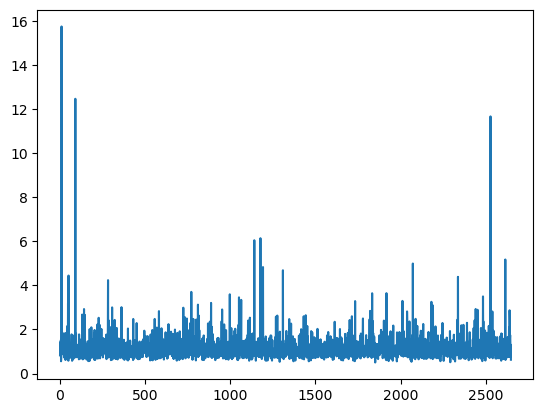

In [62]:
plt.plot(ratio_arr)
plt.show()

In [63]:
avg = np.mean(ratio_arr)
print(avg)

1.1385344713404282


# Replace the NaN values with the corresponding value calculated with the ratio


In [64]:
mod_df_copy2 = mod_df.copy()

In [65]:
temp = mod_df_copy2.CostToDate_[flat_org_est2]/1.4
temp_prime = mod_df_copy2.OriginalEstimate_[flat_cost_dat]*1.4
print(temp, temp_prime)

56      7.914804e+06
69      2.072184e+06
82      1.252298e+06
170     4.492862e+06
233     9.879938e+06
            ...     
2650    2.962779e+05
2663    5.476638e+05
2664    5.297515e+05
2688    4.511583e+06
2767    5.937053e+06
Name: CostToDate_, Length: 82, dtype: float64 44      9.312700e+05
79      1.150608e+07
109     1.980125e+05
176     1.150608e+07
220     1.150608e+07
            ...     
2678    5.615890e+04
2717    2.538541e+06
2732    6.980260e+04
2743    1.187000e+07
2757    1.150608e+07
Name: OriginalEstimate_, Length: 82, dtype: float64


In [66]:
mod_df_copy2.OriginalEstimate_[44]

665192.88

# Filling the NaN values with the calculated values

In [67]:
for k in flat_org_est2:
    mod_df_copy2.at[k, 'OriginalEstimate_'] = temp[k]

for kp in flat_cost_dat2:
    mod_df_copy2.at[kp, 'CostToDate_'] = temp_prime[kp]    

# Testing
    

In [68]:
mod_df_copy2.CostToDate_[56]

11080725.084781757

In [69]:
temp_prime

44      9.312700e+05
79      1.150608e+07
109     1.980125e+05
176     1.150608e+07
220     1.150608e+07
            ...     
2678    5.615890e+04
2717    2.538541e+06
2732    6.980260e+04
2743    1.187000e+07
2757    1.150608e+07
Name: OriginalEstimate_, Length: 82, dtype: float64

In [70]:
mod_df_copy2.CostToDate_[44]

931270.0319999999

In [71]:
mod_df_copy2.OriginalEstimate_[44]

665192.88

In [72]:
mod_df_copy2.CostToDate_.isnull().sum()

0

In [73]:
mod_df_copy2.OriginalEstimate_.isnull().sum()

0

# Date and Time

## Find the missing values in the date and time fields

In [74]:
mod_df_copy2.Start_Date_.isnull().sum()

85

In [75]:
mod_df_copy2.EstimatedFinalCompletion_.isnull().sum()

85

In [76]:
mod_df_copy2.Actual_End_Date_.isnull().sum()

81

In [77]:
np.isnan(mod_df_copy2.Start_Date_ == True)

0       False
1       False
2       False
3       False
4       False
        ...  
2808    False
2809    False
2810    False
2811    False
2812    False
Name: Start_Date_, Length: 2813, dtype: bool

In [78]:
st_dat = mod_df_copy2.Start_Date_
est_f_dat = mod_df_copy2.EstimatedFinalCompletion_
end_dat = mod_df_copy2.Actual_End_Date_

In [79]:
st_dat_isna  = st_dat.isna()
est_f_dat_isna = est_f_dat.isna()
end_dat_isna = end_dat.isna()


In [80]:
def dat_idx(s):
    return [i for i in s.index if s[i]]

In [81]:
st_dat_na = dat_idx(st_dat_isna)
est_f_dat_na = dat_idx(est_f_dat_isna)
end_dat_na = dat_idx(end_dat_isna)

In [82]:
print(len(st_dat_na),len(est_f_dat_na), len(end_dat_na))

85 85 81


In [83]:
st_est_com = common_elements(st_dat_na, est_f_dat_na)
est_end_com = common_elements(est_f_dat_na, end_dat_na)
st_end_com = common_elements(st_dat_na, end_dat_na)


In [84]:
print(st_est_com)
print(est_end_com)
print(st_end_com)

com_na = st_est_com + est_end_com + st_end_com
print(com_na)

[17, 2147]
[1641, 2765]
[1498, 1807, 2754]
[17, 2147, 1641, 2765, 1498, 1807, 2754]


## Remove the records where two date fields are empty (NaN)

In [85]:
mod_df_copy2.drop(com_na, axis = 0, inplace = True)

In [86]:
mod_df_copy2.reset_index(inplace = True)

In [87]:
mod_df_copy2.drop('index', axis = 1, inplace = True)

## Checking for NaN values

In [88]:
print(mod_df_copy2.Start_Date_[17], mod_df_copy2.EstimatedFinalCompletion_[17])

2012-09-19 2014-01-31


# Analyzing not NaN values

In [89]:
df3 = mod_df_copy2.copy()

In [90]:
def not_common_elements(list1, list2):
    return [element for element in list1 if element not in list2]

In [91]:
tatal_dat_nans = st_dat_na + est_f_dat_na + end_dat_na

In [92]:
current_nans = not_common_elements(tatal_dat_nans, com_na)

In [93]:
not_nan_st = df3[df3['Start_Date_'].notnull()]
not_nan_est = df3[df3['EstimatedFinalCompletion_'].notnull()]
not_nan_end = df3[df3['Actual_End_Date_'].notnull()]

In [94]:
nn_st_idx = not_nan_st.Start_Date_.index
nn_est_idx = not_nan_est.EstimatedFinalCompletion_.index
nn_end_idx = not_nan_end.Actual_End_Date_.index

## Fininding common not NaN values between the dates
st_est_com_idx = common_elements(nn_st_idx, nn_est_idx)
end_other_com_idx = common_elements(st_est_com_idx, nn_end_idx )

In [95]:
df4 = df3.loc[end_other_com_idx, ['Start_Date_', 'EstimatedFinalCompletion_', 'Actual_End_Date_']]

In [96]:
def create_time_obj(str_dat):
    time_obj = datetime.strptime(str_dat,'%Y-%m-%d')
    return time_obj

In [97]:
st_l = []
est_l = []
end_l = []

for t in end_other_com_idx:
    st_l.append(create_time_obj(df3.Start_Date_[t]))
    est_l.append(create_time_obj(df3.EstimatedFinalCompletion_[t]))
    end_l.append(create_time_obj(df3.Actual_End_Date_[t]))
  

In [98]:
print(len(st_l), len(est_l), len(end_l))

2569 2569 2569


In [99]:
st_t_l = []
est_t_l = []
end_t_l = []

for i in range(len(st_l)):
    st_t = (st_l[i].year, st_l[i].month)
    st_t_l.append(st_t)
    est_t = (est_l[i].year, est_l[i].month)
    est_t_l.append(est_t)
    end_t = (end_l[i].year, end_l[i].month)
    end_t_l.append(end_t)
    
#print(st_t_l, est_t_l, end_t_l)    

In [100]:
def delta(d1, d2):
    col_d = []
    for tx in range(len(d1)):
        d = (d2[tx][0] - d1[tx][0])*12 + d2[tx][1] - d1[tx][1]
        col_d.append(d)
    return col_d
    

In [101]:
colect_d1 = delta(st_t_l, est_t_l)
colect_d2 = delta(est_t_l, end_t_l)

## Find the records in which the estimated date is earlier than the start date

In [102]:
remove_list = []
remove_idx = []
for x in range(len(colect_d1)):
    if colect_d1[x] < 0:
        remove_list.append((x, colect_d1[x]))
        remove_idx.append(x)
print(remove_list, remove_idx)

[(995, -2), (1705, -6), (1717, -1), (1762, -13), (1764, -2), (1990, -20), (2194, -2)] [995, 1705, 1717, 1762, 1764, 1990, 2194]


In [103]:
df3.iloc[995, :]

IDProject_                              878
Area_                                Area_0
SubArea_                         Sub_Area_0
projectPhase_                     Completed
OriginalEstimate_                2064926.18
CostToDate_                  1937178.327512
Project_Category                 Commercial
Contract_Type_                        Other
Start_Date_                      2011-02-08
EstimatedFinalCompletion_        2011-11-26
Actual_End_Date_                 2011-06-21
Name: 995, dtype: object

In [104]:
print(st_t_l[995], est_t_l[995], remove_idx)

(2006, 8) (2006, 6) [995, 1705, 1717, 1762, 1764, 1990, 2194]


In [105]:
# This record is invalid and should be removed from the dataset
print(st_t_l[995], est_t_l[995])

(2006, 8) (2006, 6)


## The whole remove_idx list is invalid and should be removed from the data set
### remove_idx = [995, 1705, 1717, 1762, 1764, 1990, 2194]

In [106]:
tobe_removed_list = df4.iloc[remove_idx, :]

In [107]:
tobe_removed_list

,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
1085,2006-08-09,2006-06-08,2006-10-02
1861,2006-08-05,2006-02-26,2006-05-27
1875,2006-05-30,2006-04-01,2005-11-28
1925,2008-11-15,2007-10-30,2007-05-29
1927,2007-11-06,2007-09-29,2008-01-04
2175,2013-02-27,2011-06-24,2011-02-26
2404,2013-02-28,2012-12-15,2012-07-04


In [108]:
df3.iloc[1080:1090, :]

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
1080,940,Area_12,Sub_Area_12,NaN,8218625.68,9.158943e+06,Transportation,NaN,2005-05-01,2007-11-01,2007-09-08
1081,941,Area_12,Sub_Area_35,Completed,8218625.68,1.154387e+07,Transportation,Other,2005-05-26,2005-07-31,2005-10-30
1082,942,Area_12,Sub_Area_12,Completed,8218625.68,7.446737e+06,Institutional,NaN,2005-10-14,2005-12-18,NaN
1083,943,Area_12,Sub_Area_12,Completed,449676.93,4.722202e+05,Institutional,NaN,2006-02-18,2008-08-20,NaN
1084,944,Area_12,Sub_Area_12,Completed,8218625.68,5.819270e+06,Institutional,NaN,2005-12-23,2008-06-24,2008-03-12
1085,945,Area_12,Sub_Area_12,Completed,14563973.77,1.551705e+07,Institutional,Other,2006-08-09,2006-06-08,2006-10-02
1086,946,Area_12,Sub_Area_12,Completed,8218625.68,8.179951e+06,Commercial,Other,2006-07-15,2009-01-14,2009-05-05
1087,947,Area_12,Sub_Area_12,Completed,8218625.68,4.858620e+06,NaN,Other,2006-08-24,2009-02-23,2008-12-16
1088,948,Area_15,Sub_Area_12,NaN,206567.37,1.784194e+05,NaN,CCDC 5B,2006-11-14,2007-03-01,2007-05-14
1089,949,Area_12,Sub_Area_12,Completed,8218625.68,4.233244e+06,Institutional,CCDC 5B,2006-12-15,2009-06-16,2009-06-28


In [109]:
df3.drop([1085, 1861, 1875, 1925, 1927, 2175, 2404], axis = 0, inplace = True)

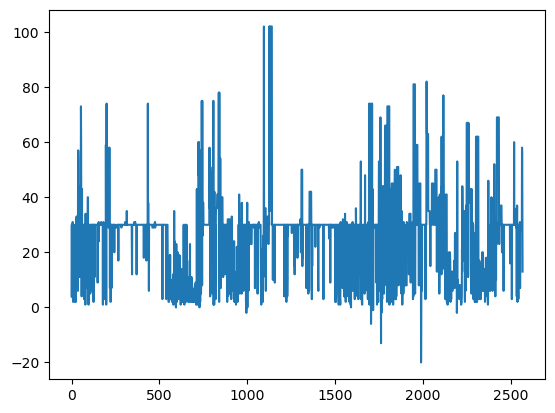

In [110]:
plt.plot(colect_d1)

In [111]:
#colect_d1

In [112]:
mean_cd1 = np.mean(colect_d1)
mean_cd2 = np.mean(colect_d2)

## Average difference between start date of the project and the estimated date to finish, and the estimated date and the real end date

In [113]:
print(mean_cd1, mean_cd2)

26.393538341767226 -0.02491241728298949


## Filling the missing dates

In [114]:
def dat_isna(s):
    return [i for i in s.index if s[i]]

In [115]:
st_dat_na2 = dat_isna(df3.Start_Date_.isna())
est_f_dat_na2 = dat_isna(df3.EstimatedFinalCompletion_.isna())
end_dat_na2 = dat_isna(df3.Actual_End_Date_.isna())

In [116]:
df3.loc[40:240, ['Start_Date_', 'EstimatedFinalCompletion_']]

,Start_Date_,EstimatedFinalCompletion_
40,2013-02-15,2017-07-26
41,NaN,2017-07-06
42,2012-09-27,2015-03-30
43,2012-10-12,2013-10-27
44,2012-09-30,NaN
...,...,...
236,2006-03-29,2008-09-28
237,2006-02-11,2010-12-15
238,2006-02-11,2010-12-15
239,2006-02-11,2010-12-15


In [258]:
def return_start_date(d2, l1):
    '''
    The date when the project has been started is being estimated according to the mean value of the differences between the whole start dates and estimated 
    end dates of the whole poplulation to fill the missing dates.
    '''
    d1_l = []
    #d1_l_totime = []
    for d in (l1):
        d2_t_obj = create_time_obj(d2[d])
        if d2_t_obj.month <= 2:
            
            d1 = f'{d2_t_obj.year - 2}-{d2_t_obj.month}-{d2_t_obj.day}'
            #d1 = (d2_t_obj.year - 2, d2_t_obj.month, d2_t_obj.day)
        else:
            d1 = f'{d2_t_obj.year - 2}-{d2_t_obj.month - 2}-{d2_t_obj.day}'
            #d1 = (d2_t_obj.year - 2, d2_t_obj.month - 2, d2_t_obj.day)
            
        d1_l.append(d1)
        #d1_l_totime.append(datetime(*d1))
    return d1_l

In [259]:
fill_dats = return_start_date(df3.EstimatedFinalCompletion_, st_dat_na2)

In [260]:
print(fill_dats, f'\n', st_dat_na2)

['2015-5-6', '2012-1-23', '2013-5-4', '2004-9-10', '2003-7-30', '2006-10-1', '2005-7-1', '2006-6-31', '2006-6-31', '2007-6-31', '2007-6-31', '2009-9-6', '2009-10-7', '2010-1-24', '2010-10-19', '2005-7-15', '2007-7-2', '2009-2-27', '2008-1-30', '2007-6-30', '2007-5-15', '2007-4-21', '2010-4-4', '2012-1-26', '2012-1-26', '2012-9-13', '2008-3-4', '2009-5-23', '2010-8-1', '2007-1-29', '2011-4-16', '2010-8-27', '2011-2-23', '2012-2-26', '2011-4-30', '2008-5-31', '2011-3-28', '2012-4-2', '2012-9-1', '2005-8-2', '2005-9-1', '2006-2-1', '2006-9-1', '2006-10-7', '2008-6-7', '2007-1-11', '2005-2-3', '2005-5-13', '2003-7-30', '2004-9-17', '2004-2-30', '2006-8-1', '2006-10-1', '2011-9-10', '2009-10-20', '2009-2-27', '2008-8-30', '2014-1-14', '2010-7-3', '2010-1-14', '2010-4-22', '2011-4-12', '2011-4-17', '2011-7-23', '2011-9-9', '2011-10-1', '2010-6-17', '2011-10-31', '2006-4-14', '2011-2-28', '2010-10-23', '2008-4-1', '2008-9-13', '2010-7-23', '2010-1-1', '2009-6-30', '2010-1-25', '2011-1-31', '2

In [261]:
type(fill_dats[0][0])

str

In [263]:
df3.loc[[41, 74, 98, 129, 148, 181, 206, 234, 241, 279, 283, 432], ['Start_Date_', 'EstimatedFinalCompletion_']]

,Start_Date_,EstimatedFinalCompletion_
41,"(2015, 5, 6)",2017-07-06
74,"(2012, 1, 23)",2014-03-23
98,"(2013, 5, 4)",2015-07-04
129,"(2004, 9, 10)",2006-11-10
148,"(2003, 7, 30)",2005-09-30
181,"(2006, 10, 1)",2008-12-01
206,"(2005, 7, 1)",2007-09-01
234,"(2006, 6, 31)",2008-08-31
241,"(2006, 6, 31)",2008-08-31
279,"(2007, 6, 31)",2009-08-31


# Filling the NaN values of the Start Date column

In [264]:
for l in range(len(st_dat_na2)):
    df3.at[st_dat_na2[l], 'Start_Date_'] = fill_dats[l]

In [265]:
df3.loc[[41, 74, 98, 129, 148, 181, 206, 234, 241, 279, 283, 432], ['Start_Date_', 'EstimatedFinalCompletion_']]

,Start_Date_,EstimatedFinalCompletion_
41,2015-5-6,2017-07-06
74,2012-1-23,2014-03-23
98,2013-5-4,2015-07-04
129,2004-9-10,2006-11-10
148,2003-7-30,2005-09-30
181,2006-10-1,2008-12-01
206,2005-7-1,2007-09-01
234,2006-6-31,2008-08-31
241,2006-6-31,2008-08-31
279,2007-6-31,2009-08-31


In [266]:
df3.Start_Date_.isna().sum()

0

In [267]:
df3.loc[est_f_dat_na2, ['EstimatedFinalCompletion_','Actual_End_Date_' ]]

,EstimatedFinalCompletion_,Actual_End_Date_
44,"(2015, 3, 17)",2015-03-16
62,"(2012, 12, 8)",2012-12-07
72,"(2015, 5, 22)",2015-05-21
76,"(2013, 7, 9)",2013-07-08
184,"(2007, 8, 30)",2007-08-30
...,...,...
2531,"(2015, 6, 12)",2015-06-11
2609,"(2012, 9, 22)",2012-09-21
2642,"(2008, 2, 7)",2008-02-06
2644,"(2010, 9, 20)",2010-09-19


In [268]:
def return_est_date(d3, l2):
    '''
    The estimated final date is calculated based on the average difference betwwen the estimated final date and the actual end dates; -0.024 month
    which means that the projcts end dates where apporiximately 30% earlier than estimated which is alomost 1 day
    '''
    d2_l = []
    
    for dt in (l2):
        d3_t_obj = create_time_obj(d3[dt])
        if d3_t_obj.day >= 28:
            d2 = f'{d3_t_obj.year}-{d3_t_obj.month}-{d3_t_obj.day}'
            #d2 = (d3_t_obj.year, d3_t_obj.month, d3_t_obj.day)
        else:
            d2 = f'{d3_t_obj.year}-{d3_t_obj.month}-{d3_t_obj.day + 1}'
            #d2 = (d3_t_obj.year, d3_t_obj.month, d3_t_obj.day + 1)
        d2_l.append(d2)
        
    return d2_l

In [269]:
fill_dat2 = return_est_date(df3.Actual_End_Date_, est_f_dat_na2)

In [270]:
df3.Actual_End_Date_[est_f_dat_na2]

44      2015-03-16
62      2012-12-07
72      2015-05-21
76      2013-07-08
184     2007-08-30
           ...    
2531    2015-06-11
2609    2012-09-21
2642    2008-02-06
2644    2010-09-19
2706    2013-09-11
Name: Actual_End_Date_, Length: 81, dtype: object

## Filling the missing estimated date values acoording to the final dates of the project

In [271]:
for l in range(len(est_f_dat_na2)):
    df3.at[est_f_dat_na2[l], 'EstimatedFinalCompletion_'] = fill_dat2[l]

In [272]:
df3.loc[est_f_dat_na2, ['EstimatedFinalCompletion_','Actual_End_Date_' ]]

,EstimatedFinalCompletion_,Actual_End_Date_
44,2015-3-17,2015-03-16
62,2012-12-8,2012-12-07
72,2015-5-22,2015-05-21
76,2013-7-9,2013-07-08
184,2007-8-30,2007-08-30
...,...,...
2531,2015-6-12,2015-06-11
2609,2012-9-22,2012-09-21
2642,2008-2-7,2008-02-06
2644,2010-9-20,2010-09-19


In [273]:
df3.EstimatedFinalCompletion_.isna().sum()

0

# Filling missing values of the final dates

In [274]:
def return_end_date(d2, l3):
    '''
    The final date is calculated based on the average difference betwwen the estimated final date and the actual end dates; 0.024 month
    which means that the projcts end dates where apporiximately 30% earlier than estimated which is alomost 1 day
    '''
    d3_l = []
    
    for dtt in (l3):
        d2_t_obj = create_time_obj(d2[dtt])
        if d2_t_obj.day <= 1:
            d3 = f'{d2_t_obj.year}-{d2_t_obj.month}-{d2_t_obj.day}'
            #d3 = (d2_t_obj.year, d2_t_obj.month, d2_t_obj.day)
        else:
            d3 = f'{d2_t_obj.year}-{d2_t_obj.month}-{d2_t_obj.day - 1}'
            #d3 = (d2_t_obj.year, d2_t_obj.month, d2_t_obj.day - 1)
        d3_l.append(d3)
        
    return d3_l

In [275]:
fill_dat3 = return_end_date(df3.EstimatedFinalCompletion_, end_dat_na2)

In [276]:
df3.loc[end_dat_na2, 'EstimatedFinalCompletion_']

21      2015-01-07
43      2013-10-27
52      2016-08-03
65      2013-05-08
96      2015-04-01
           ...    
2568    2012-06-24
2685    2012-07-08
2704    2013-10-12
2733    2014-06-09
2736    2014-06-09
Name: EstimatedFinalCompletion_, Length: 76, dtype: object

In [277]:
for ll in range(len(end_dat_na2)):
    df3.at[end_dat_na2[ll], 'Actual_End_Date_'] = fill_dat3[ll]

In [278]:
df3.loc[end_dat_na2, ['EstimatedFinalCompletion_','Actual_End_Date_' ]]

,EstimatedFinalCompletion_,Actual_End_Date_
21,2015-01-07,2015-1-6
43,2013-10-27,2013-10-26
52,2016-08-03,2016-8-2
65,2013-05-08,2013-5-7
96,2015-04-01,2015-4-1
...,...,...
2568,2012-06-24,2012-6-23
2685,2012-07-08,2012-7-7
2704,2013-10-12,2013-10-11
2733,2014-06-09,2014-6-8


In [279]:
df3.Actual_End_Date_.isna().sum()

0

In [280]:
df3

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,Area_0,Sub_Area_0,Completed,9.519200e+05,1.155157e+06,Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,1,Area_1,Sub_Area_1,Completed,1.478396e+05,1.334481e+05,Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,2,Area_1,Sub_Area_1,Completed,6.070518e+04,4.245956e+04,Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,3,Area_2,Sub_Area_2,Completed,2.804828e+05,3.003621e+05,Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,4,Area_3,Sub_Area_3,Completed,2.833996e+06,2.747140e+06,Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...
2801,2108,Area_16,Sub_Area_14,Completed,8.218626e+06,4.738921e+06,Institutional,Other,2009-2-10,2011-02-10,2010-11-06
2802,2109,Area_12,Sub_Area_12,Completed,1.298898e+08,1.036424e+08,Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2803,2110,Area_12,Sub_Area_12,Completed,1.999900e+08,2.684085e+08,Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2804,2111,Area_12,Sub_Area_12,Completed,8.190600e+06,6.272629e+06,Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28


In [281]:
df3.to_csv('df_final.csv', sep=',')

# Dealing with categorical data

In [282]:
df_temp = pd.read_csv("df_final.csv", sep= ',')

In [283]:
df_temp.Area_.isna().sum()

84

In [284]:
area_nan = df_temp.Area_.isna()
suba_nan = df_temp.SubArea_.isna()

In [285]:
area_nan_idx = dat_idx(area_nan)
suba_nan_idx = dat_idx(suba_nan)

In [286]:
reps_a_l = [i-1 for i in area_nan_idx]
reps_sa_l = [j-1 for j in suba_nan_idx]

for i in range(len(area_nan_idx)):
    df_temp.at[area_nan_idx[i], 'Area_'] = df_temp.Area_[reps_a_l[i]]
    
for j in range(len(suba_nan_idx)):
    df_temp.at[suba_nan_idx[j], 'SubArea_'] = df_temp.SubArea_[reps_sa_l[j]] 
    
    

In [287]:
df_temp.Area_.isna().sum()

0

In [288]:
df_temp.SubArea_.isna().sum()

0

# Train and test splits

In [289]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import random

In [290]:
df5 = df_temp.copy()

In [291]:
df_for_train = df5.loc[:,['IDProject_', 'Area_', 'SubArea_', 'OriginalEstimate_', 'CostToDate_','Start_Date_', 'EstimatedFinalCompletion_', 'Actual_End_Date_']]

In [292]:
df_for_train

,IDProject_,Area_,SubArea_,OriginalEstimate_,CostToDate_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,0,Area_0,Sub_Area_0,9.519200e+05,1.155157e+06,2012-08-15,2012-12-23,2013-04-02
1,1,Area_1,Sub_Area_1,1.478396e+05,1.334481e+05,2012-09-01,2015-03-04,2015-05-25
2,2,Area_1,Sub_Area_1,6.070518e+04,4.245956e+04,2012-09-01,2013-01-01,2012-11-12
3,3,Area_2,Sub_Area_2,2.804828e+05,3.003621e+05,2012-07-11,2015-01-11,2014-08-31
4,4,Area_3,Sub_Area_3,2.833996e+06,2.747140e+06,2012-10-03,2013-02-28,2013-07-01
...,...,...,...,...,...,...,...,...
2794,2108,Area_16,Sub_Area_14,8.218626e+06,4.738921e+06,2009-2-10,2011-02-10,2010-11-06
2795,2109,Area_12,Sub_Area_12,1.298898e+08,1.036424e+08,2008-05-01,2013-03-23,2013-09-18
2796,2110,Area_12,Sub_Area_12,1.999900e+08,2.684085e+08,2008-05-15,2013-01-13,2012-11-02
2797,2111,Area_12,Sub_Area_12,8.190600e+06,6.272629e+06,2008-06-22,2010-09-11,2010-04-28


# Laling the data based on the level of risk; High risk, Medium risk, Low risk, and Very low risk

## Here are my assumptions for calculating the risk factor and classification of the data. The definitions of these criteria are highly depend on the company
### High risk ----> When the actual cost > estimated cost, and actual end time > estimated end time
### Medium risk ----> When the actual cost > estimated cost and actual end time < estimated end time
### Low risk ----> When the actual cost < estimated cost and actual end time > estimated end time
### Very low risk ----> When the actual cost < estimated cost and actual end time < estimated end time

In [293]:
high_risk = []
high_risk_l = []
mid_risk = []
mid_risk_l = []
low_risk = []
low_risk_l = []
very_low_risk = []
very_low_risk_l = []

for i in range(df_for_train.shape[0]):
    if (df_for_train.CostToDate_[i] > df_for_train.OriginalEstimate_[i]) and (df_for_train.Actual_End_Date_[i]> df_for_train.EstimatedFinalCompletion_[i]):
        
        #pd.concat([df_high_risk, df_for_train.iloc[i,:]], axis = 0, ignore_index=True, sort=False)
        high_risk_l.append('High risk')
        high_risk.append(df_for_train.iloc[i,:])
    
    elif (df_for_train.CostToDate_[i] > df_for_train.OriginalEstimate_[i]) and (df_for_train.Actual_End_Date_[i]< df_for_train.EstimatedFinalCompletion_[i]):
        mid_risk.append(df_for_train.iloc[i,:])
        mid_risk_l.append('Mid risk')
    
    elif (df_for_train.CostToDate_[i] < df_for_train.OriginalEstimate_[i]) and (df_for_train.Actual_End_Date_[i]> df_for_train.EstimatedFinalCompletion_[i]):
        low_risk.append(df_for_train.iloc[i,:])
        low_risk_l.append('Low risk')
    
    else:
        very_low_risk.append(df_for_train.iloc[i,:])
        very_low_risk_l.append('Very low risk')
        

In [294]:
df_high_risk = pd.DataFrame(high_risk)
df_high_risk['Risk'] = high_risk_l 
df_mid_risk = pd.DataFrame(mid_risk)
df_mid_risk['Risk'] = mid_risk_l
df_low_risk = pd.DataFrame(low_risk)
df_low_risk['Risk'] = low_risk_l
df_very_low_risk = pd.DataFrame(very_low_risk)
df_very_low_risk['Risk'] = very_low_risk_l

In [295]:
df_low_risk

,IDProject_,Area_,SubArea_,OriginalEstimate_,CostToDate_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,Risk
1,1,Area_1,Sub_Area_1,1.478396e+05,1.334481e+05,2012-09-01,2015-03-04,2015-05-25,Low risk
4,4,Area_3,Sub_Area_3,2.833996e+06,2.747140e+06,2012-10-03,2013-02-28,2013-07-01,Low risk
5,4,Area_3,Sub_Area_3,2.833996e+06,1.863670e+06,2012-10-03,2013-02-28,2013-08-10,Low risk
13,11,Area_8,Sub_Area_8,8.218626e+06,6.932146e+06,2012-08-23,2013-01-31,2013-07-13,Low risk
14,11,Area_8,Sub_Area_8,8.218626e+06,7.176280e+06,2012-08-23,2013-01-31,2013-02-06,Low risk
...,...,...,...,...,...,...,...,...,...
2772,2086,Area_14,Sub_Area_11,8.218626e+06,5.074220e+06,2007-10-31,2008-03-30,2008-08-15,Low risk
2775,2089,Area_14,Sub_Area_11,8.218626e+06,5.488553e+06,2008-05-01,2009-02-28,2009-04-29,Low risk
2777,2091,Area_14,Sub_Area_11,8.218626e+06,7.967936e+06,2008-10-18,2009-10-31,2010-01-18,Low risk
2792,2106,Area_17,Sub_Area_17,8.218626e+06,5.312386e+06,2005-01-16,2007-07-19,2007-08-16,Low risk


In [296]:
df_total = pd.concat([df_high_risk, df_mid_risk, df_low_risk, df_very_low_risk], axis = 0, ignore_index=True)

In [297]:
df_total

,IDProject_,Area_,SubArea_,OriginalEstimate_,CostToDate_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,Risk
0,0,Area_0,Sub_Area_0,951920.00,1.155157e+06,2012-08-15,2012-12-23,2013-04-02,High risk
1,6,Area_5,Sub_Area_5,3015325.59,4.318494e+06,2012-09-01,2013-01-31,2013-03-24,High risk
2,15,Area_9,Sub_Area_8,113296.00,1.351211e+05,2012-07-07,2015-01-07,2015-1-6,High risk
3,17,Area_10,Sub_Area_10,20997245.50,2.585863e+07,2012-09-15,2014-06-01,2014-10-19,High risk
4,17,Area_10,Sub_Area_10,20997245.50,2.566823e+07,2012-09-15,2014-06-01,2014-06-19,High risk
...,...,...,...,...,...,...,...,...,...
2794,2104,Area_17,Sub_Area_17,8218625.68,2.866189e+06,2004-11-21,2007-05-24,2006-12-13,Very low risk
2795,2105,Area_17,Sub_Area_17,8218625.68,3.341920e+06,2004-12-15,2007-06-17,2007-03-24,Very low risk
2796,2107,Area_17,Sub_Area_17,1449911.15,8.497328e+05,2005-10-19,2008-04-20,2008-03-01,Very low risk
2797,2108,Area_16,Sub_Area_14,8218625.68,4.738921e+06,2009-2-10,2011-02-10,2010-11-06,Very low risk


### Assign random numbers to the IDs to avoid training problems

In [298]:
rand_id = random.sample(range(df_total.shape[0]), df_total.shape[0])

In [299]:
new_rand_l = []
for idn in rand_id:
    new_rand_i = 'ID_ran_' + str(rand_id[idn])
    new_rand_l.append(new_rand_i)

id_prj = df_total.IDProject_.values.tolist()    

In [300]:
id_table = pd.DataFrame(
    { 'id_rand': new_rand_l,
      'id_prj': id_prj
    })

In [301]:
id_table

,id_rand,id_prj
0,ID_ran_1358,0
1,ID_ran_1314,6
2,ID_ran_1852,15
3,ID_ran_2462,17
4,ID_ran_1415,17
...,...,...
2794,ID_ran_52,2104
2795,ID_ran_2518,2105
2796,ID_ran_415,2107
2797,ID_ran_766,2108


In [302]:
df_total.drop(['IDProject_'], axis =1, inplace = True)

In [303]:
dft = df_total.set_index(id_table.id_rand)

In [304]:
dft

,Area_,SubArea_,OriginalEstimate_,CostToDate_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,Risk
id_rand,,,,,,,,
ID_ran_1358,Area_0,Sub_Area_0,951920.00,1.155157e+06,2012-08-15,2012-12-23,2013-04-02,High risk
ID_ran_1314,Area_5,Sub_Area_5,3015325.59,4.318494e+06,2012-09-01,2013-01-31,2013-03-24,High risk
ID_ran_1852,Area_9,Sub_Area_8,113296.00,1.351211e+05,2012-07-07,2015-01-07,2015-1-6,High risk
ID_ran_2462,Area_10,Sub_Area_10,20997245.50,2.585863e+07,2012-09-15,2014-06-01,2014-10-19,High risk
ID_ran_1415,Area_10,Sub_Area_10,20997245.50,2.566823e+07,2012-09-15,2014-06-01,2014-06-19,High risk
...,...,...,...,...,...,...,...,...
ID_ran_52,Area_17,Sub_Area_17,8218625.68,2.866189e+06,2004-11-21,2007-05-24,2006-12-13,Very low risk
ID_ran_2518,Area_17,Sub_Area_17,8218625.68,3.341920e+06,2004-12-15,2007-06-17,2007-03-24,Very low risk
ID_ran_415,Area_17,Sub_Area_17,1449911.15,8.497328e+05,2005-10-19,2008-04-20,2008-03-01,Very low risk


## Converting dates to numerical values to avoid training problems

In [320]:
def timestamp_to_numeric(timestamp):
    epoch = dt.datetime.utcfromtimestamp(0)  
    delta = timestamp - epoch  
    return delta.total_seconds() 

t_ex = dt.datetime(2022,1,28)  
num_val = timestamp_to_numeric(t_ex)

In [321]:
dft.Start_Date_

id_rand
ID_ran_1358    2012-08-15
ID_ran_1314    2012-09-01
ID_ran_1852    2012-07-07
ID_ran_2462    2012-09-15
ID_ran_1415    2012-09-15
                  ...    
ID_ran_52      2004-11-21
ID_ran_2518    2004-12-15
ID_ran_415     2005-10-19
ID_ran_766      2009-2-10
ID_ran_1728    2008-06-22
Name: Start_Date_, Length: 2799, dtype: object

In [319]:
num_val

1643328000.0

In [323]:
## Find real type of the dates before being an string
from ast import literal_eval

def str_to_type(s):
    try:
        k = literal_eval(s)
        return type(k)
    except:
        return type(s)

In [324]:
print(str_to_type(dft.Start_Date_[-2]))

<class 'str'>


In [325]:
print(type(dft.Start_Date_['ID_ran_2588']))

<class 'str'>


In [308]:
out1_l = []
out2_l = []
for it in range(1000):
    try:
        time_obj = datetime.strptime(dft.Start_Date_[it],'%Y-%m-%d')
    except:
        print("day is out of range for month")
        out = timestamp_to_numeric(time_obj)  
        out2_l.append(out)

day is out of range for month
day is out of range for month
day is out of range for month


In [315]:
out1_l = []
out2_l = []
for it in range(10):
    typ = str_to_type(dft.Start_Date_[it])
    if typ == tuple:
        dt_obj_tup = dt.datetime(literal_eval(dft.Start_Date_[it]))
        num_val = timestamp_to_numeric(dt_obj_tup)
        out1_l.append(num_val)
        
    elif typ == str:
        time_obj = datetime.strptime(dft.Start_Date_[it],'%Y-%m-%d')
        out = timestamp_to_numeric(time_obj)  
        out2_l.append(out)      

In [326]:
out2_l # Numerical values of some of the dates

[1344988800.0,
 1346457600.0,
 1341619200.0,
 1347667200.0,
 1347667200.0,
 1347408000.0,
 1348012800.0,
 1348963200.0,
 1362096000.0,
 1325376000.0]

In [44]:
dft.Start_Date_[t]

'2006-6-31'

In [334]:
X = dft.loc[:, ['OriginalEstimate_', 'CostToDate_','Start_Date_', 'EstimatedFinalCompletion_', 'Actual_End_Date_']]
y = dft.loc[:, 'Risk']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = dft['Risk'], shuffle= True)

In [336]:
dft_cat = dft.loc[:, ['Area_', 'SubArea_']]
dft_num = dft.loc[:, ['OriginalEstimate_', 'CostToDate_','Start_Date_', 'EstimatedFinalCompletion_', 'Actual_End_Date_']]

In [337]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), dft_cat)])

In [338]:
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'),
                                Area_     SubArea_
id_rand                          
ID_ran_1358   Area_0   Sub_Area_0
ID_ran_1314   Area_5   Sub_Area_5
ID_ran_1852   Area_9   Sub_Area_8
ID_ran_2462  Area_10  Sub_Area_10
ID_ran_1415  Area_10  Sub_Area_10
...              ...          ...
ID_ran_52    Area_17  Sub_Area_17
ID_ran_2518  Area_17  Sub_Area_17
ID_ran_415   Area_17  Sub_Area_17
ID_ran_766   Area_16  Sub_Area_14
ID_ran_1728  Area_12  Sub_Area_12

[2799 rows x 2 columns])])

##### The categorical values don't seem to have considerable impact on the classes

In [339]:
nums = dft.loc[:, ['OriginalEstimate_', 'CostToDate_']]

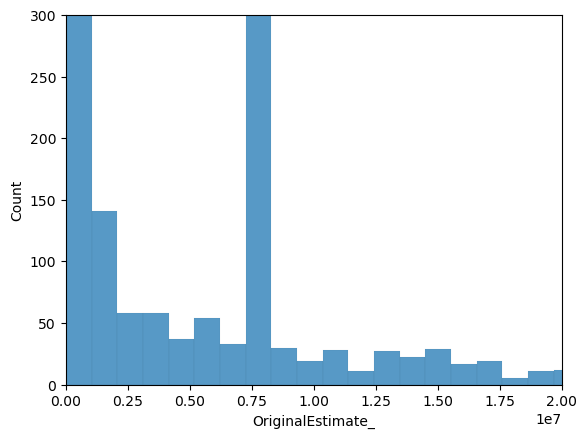

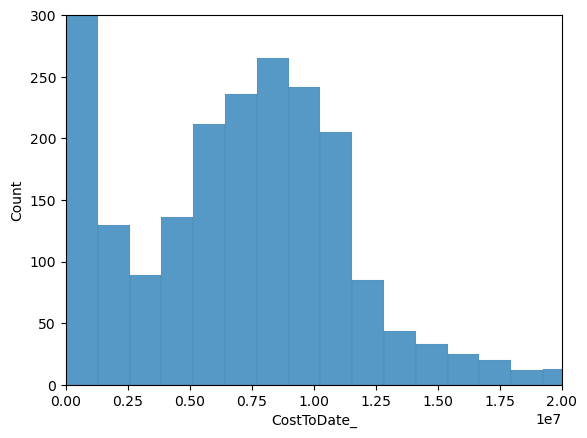

In [329]:
for col in range(nums.shape[1]):
    fig, ax = plt.subplots()
    sns.histplot(data = nums.iloc[:,col], ax = ax)
    ax.set_ylim(0,300)
    ax.set_xlim(0, 2e+07)
    plt.show()

# Model development and training

In [340]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500]},
     
    
    GradientBoostingClassifier(random_state=0):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     }
}

In [341]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [342]:
for clf, param in grid.items():
    print(clf)
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500]}


GradientBoostingClassifier(random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__learning_rate': [0.001, 0.01, 0.1, 1, 10], 'model__boosting_type': ['gbdt', 'goss', 'dart']}


